Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp', u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn', u'marstat', u'fmarstat', u'fmarit', u'evrmarry', u'hisp', u'hispgrp', u'numrace', u'roscnt', u'hplocale', u'manrel', u'fl_rage', u'fl_rrace', u'fl_rhisp', u'goschol', u'vaca', u'higrade', u'compgrd', u'havedip', u'dipged', u'cmhsgrad', u'havedeg', u'degrees', u'wthparnw', u'onown', u'intact', u'parmarr', u'lvsit14f', u'lvsit14m', u'womrasdu', u'momdegre', u'momworkd', u'momchild', u'momfstch', u'mom18', u'manrasdu', u'daddegre', u'bothbiol', u'intact18', u'onown18', u'numbabes', u'totplacd', u'nplaced', u'ndied', u'nadoptv', u'hasbabes', u'cmlastlb', u'cmfstprg', u'cmlstprg', u'menarche', u'pregnowq', u'maybpreg', u'numpregs', u'everpreg', u'currpreg', u'moscurrp', u'giveadpt', u'ngivenad', u'otherkid', u'nothrkid', u'sexothkd', u'relothkd', u'adptotkd', u'tryadopt', u'tryeithr', u'stilhere', u'cmokdcam', u'othkdfos', u'cmokddob', u'othkdspn', u'othkdrac1'

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

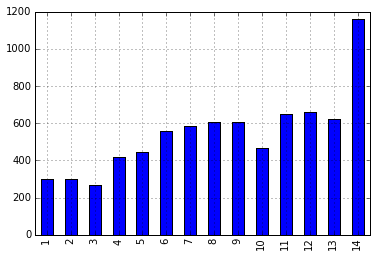

In [3]:
resp.totincr.value_counts().sort_index().plot(kind='bar')

In [4]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)

Display the histogram.

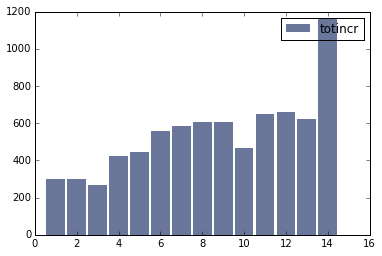

In [5]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

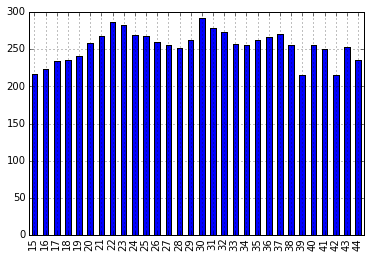

In [7]:
resp.age_r.value_counts().sort_index().plot(kind='bar')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

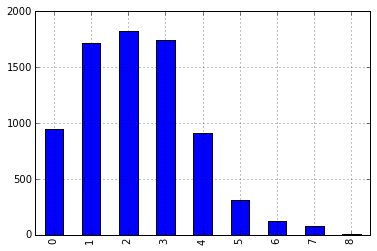

In [8]:
resp.numfmhh.value_counts().sort_index().plot(kind='bar')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

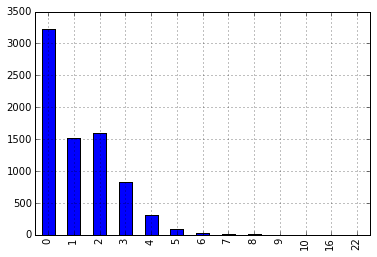

In [9]:
resp.parity.value_counts().sort_index().plot(kind='bar')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [10]:
resp.parity.value_counts().sort_index().tail(5)

8     8
9     2
10    3
16    1
22    1
dtype: int64

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

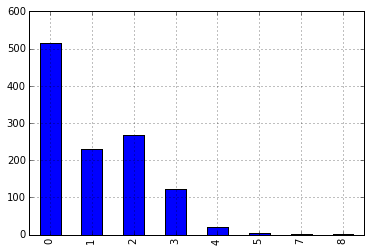

In [11]:
resp[resp.totincr == 14].parity.value_counts().\
sort_index().plot(kind='bar')

Find the largest parities for high income respondents.

In [12]:
resp[resp.totincr == 14].\
parity.value_counts().sort_index().tail(5)

3    123
4     19
5      5
7      1
8      1
dtype: int64

Compare the mean <tt>parity</tt> for high income respondents and others.

In [13]:
resp[resp.totincr == 14].parity.mean()

1.0758620689655172

In [14]:
resp[resp.totincr != 14].parity.mean()

1.2495758136665125

Investigate any other variables that look interesting.